In [1]:
apikey = 'iLBEFHbuxtFzoHbOAPUYY2SIcPRkqalCFyDeJiuTekyEJoKjSZLqcD9zG6VKC5gM'
secret = 'QmnjNfju1HRIWFFbiCInpspXmqEjYrH1SbVlXBhDuo5ns6wcfMaNREj2W2b7Kxfu'

In [2]:
!pip3 install  mplfinance  python-binance 

In [75]:
import pandas as pd
import numpy as np
import OpenBlender
from binance import Client
import math


In [4]:
#Authenticate
client = Client(apikey,secret)

In [5]:
#get tickers
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.07359000'},
 {'symbol': 'LTCBTC', 'price': '0.00448500'},
 {'symbol': 'BNBBTC', 'price': '0.01696700'},
 {'symbol': 'NEOBTC', 'price': '0.00041400'},
 {'symbol': 'QTUMETH', 'price': '0.00171600'},
 {'symbol': 'EOSETH', 'price': '0.00079300'},
 {'symbol': 'SNTETH', 'price': '0.00001791'},
 {'symbol': 'BNTETH', 'price': '0.00029600'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00012800'},
 {'symbol': 'BNBETH', 'price': '0.23050000'},
 {'symbol': 'BTCUSDT', 'price': '16824.27000000'},
 {'symbol': 'ETHUSDT', 'price': '1237.91000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001318'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [6]:
#get historicsl data
historical_BTC =client.get_historical_klines('BTCUSDT', client.KLINE_INTERVAL_1DAY,'1 Jan 2022')
historical_BTC

[[1640995200000,
  '46216.93000000',
  '47954.63000000',
  '46208.37000000',
  '47722.65000000',
  '19604.46325000',
  1641081599999,
  '924155159.58348650',
  714899,
  '9942.36679000',
  '468738711.79010650',
  '0'],
 [1641081600000,
  '47722.66000000',
  '47990.00000000',
  '46654.00000000',
  '47286.18000000',
  '18340.46040000',
  1641167999999,
  '866610995.56335820',
  709624,
  '9166.46954000',
  '433182392.28194660',
  '0'],
 [1641168000000,
  '47286.18000000',
  '47570.00000000',
  '45696.00000000',
  '46446.10000000',
  '27662.07710000',
  1641254399999,
  '1292203508.32565490',
  885624,
  '13524.76045000',
  '631879430.11428000',
  '0'],
 [1641254400000,
  '46446.10000000',
  '47557.54000000',
  '45500.00000000',
  '45832.01000000',
  '35491.41360000',
  1641340799999,
  '1649170424.12761340',
  1021815,
  '17689.26808000',
  '821725463.08080750',
  '0'],
 [1641340800000,
  '45832.01000000',
  '47070.00000000',
  '42500.00000000',
  '43451.13000000',
  '51784.11857000',
  

In [7]:
hist_BTC = pd.DataFrame(historical_BTC)
hist_BTC.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1640995200000,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000,1641081599999,924155159.58348650,714899,9942.36679000,468738711.79010650,0
1,1641081600000,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000,1641167999999,866610995.56335820,709624,9166.46954000,433182392.28194660,0
2,1641168000000,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000,1641254399999,1292203508.32565490,885624,13524.76045000,631879430.11428000,0
3,1641254400000,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000,1641340799999,1649170424.12761340,1021815,17689.26808000,821725463.08080750,0
4,1641340800000,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000,1641427199999,2334288544.64544840,1478532,23552.99460000,1063287226.35714140,0


In [8]:
hist_BTC.columns= ['Open Time','Open', 'High', 'Low', 'Close','Volume','Close Time','Quote Asset Volume','Number of Trades', 'TB Base Volume','TB Quote Volume', 'Ignore' ]
hist_BTC

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1640995200000,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000,1641081599999,924155159.58348650,714899,9942.36679000,468738711.79010650,0
1,1641081600000,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000,1641167999999,866610995.56335820,709624,9166.46954000,433182392.28194660,0
2,1641168000000,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000,1641254399999,1292203508.32565490,885624,13524.76045000,631879430.11428000,0
3,1641254400000,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000,1641340799999,1649170424.12761340,1021815,17689.26808000,821725463.08080750,0
4,1641340800000,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000,1641427199999,2334288544.64544840,1478532,23552.99460000,1063287226.35714140,0
...,...,...,...,...,...,...,...,...,...,...,...,...
337,1670112000000,16885.20000000,17202.84000000,16878.25000000,17105.70000000,178619.13387000,1670198399999,3040020095.05117780,3948990,89359.35165000,1520945572.07683370,0
338,1670198400000,17106.65000000,17424.25000000,16867.00000000,16966.35000000,233703.29225000,1670284799999,4015334796.60372110,5138207,115508.19916000,1984551471.31640810,0
339,1670284800000,16966.35000000,17107.01000000,16906.37000000,17088.96000000,218730.76883000,1670371199999,3717926010.34058660,4416864,108449.54144000,1843473774.58616420,0
340,1670371200000,17088.96000000,17142.21000000,16678.83000000,16836.64000000,220657.41334000,1670457599999,3723206794.30546690,4284989,107803.05198000,1819002376.49286860,0


In [9]:
#change Open Time  & Close Time to date Time
hist_BTC['Open Time']  = pd.to_datetime(hist_BTC['Open Time']/1000, unit ='s')
hist_BTC['Close Time']  = pd.to_datetime (hist_BTC['Close Time']/1000, unit='s')

In [10]:
hist_BTC.dtypes

Open Time             datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
Number of Trades               int64
TB Base Volume                object
TB Quote Volume               object
Ignore                        object
dtype: object

In [11]:
hist_BTC

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2022-01-01,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000,2022-01-01 23:59:59.999000064,924155159.58348650,714899,9942.36679000,468738711.79010650,0
1,2022-01-02,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000,2022-01-02 23:59:59.999000064,866610995.56335820,709624,9166.46954000,433182392.28194660,0
2,2022-01-03,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000,2022-01-03 23:59:59.999000064,1292203508.32565490,885624,13524.76045000,631879430.11428000,0
3,2022-01-04,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000,2022-01-04 23:59:59.999000064,1649170424.12761340,1021815,17689.26808000,821725463.08080750,0
4,2022-01-05,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000,2022-01-05 23:59:59.999000064,2334288544.64544840,1478532,23552.99460000,1063287226.35714140,0
...,...,...,...,...,...,...,...,...,...,...,...,...
337,2022-12-04,16885.20000000,17202.84000000,16878.25000000,17105.70000000,178619.13387000,2022-12-04 23:59:59.999000064,3040020095.05117780,3948990,89359.35165000,1520945572.07683370,0
338,2022-12-05,17106.65000000,17424.25000000,16867.00000000,16966.35000000,233703.29225000,2022-12-05 23:59:59.999000064,4015334796.60372110,5138207,115508.19916000,1984551471.31640810,0
339,2022-12-06,16966.35000000,17107.01000000,16906.37000000,17088.96000000,218730.76883000,2022-12-06 23:59:59.999000064,3717926010.34058660,4416864,108449.54144000,1843473774.58616420,0
340,2022-12-07,17088.96000000,17142.21000000,16678.83000000,16836.64000000,220657.41334000,2022-12-07 23:59:59.999000064,3723206794.30546690,4284989,107803.05198000,1819002376.49286860,0


In [12]:
# filter numeric columns
numeric_columns =  ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_BTC[numeric_columns]

,Open,High,Low,Close,Volume,Quote Asset Volume,TB Base Volume,TB Quote Volume
0,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000,924155159.58348650,9942.36679000,468738711.79010650
1,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000,866610995.56335820,9166.46954000,433182392.28194660
2,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000,1292203508.32565490,13524.76045000,631879430.11428000
3,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000,1649170424.12761340,17689.26808000,821725463.08080750
4,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000,2334288544.64544840,23552.99460000,1063287226.35714140
...,...,...,...,...,...,...,...,...
337,16885.20000000,17202.84000000,16878.25000000,17105.70000000,178619.13387000,3040020095.05117780,89359.35165000,1520945572.07683370
338,17106.65000000,17424.25000000,16867.00000000,16966.35000000,233703.29225000,4015334796.60372110,115508.19916000,1984551471.31640810
339,16966.35000000,17107.01000000,16906.37000000,17088.96000000,218730.76883000,3717926010.34058660,108449.54144000,1843473774.58616420
340,17088.96000000,17142.21000000,16678.83000000,16836.64000000,220657.41334000,3723206794.30546690,107803.05198000,1819002376.49286860


In [13]:
# change the filtered columns to numeric
hist_BTC[numeric_columns] = hist_BTC[numeric_columns].apply(pd.to_numeric, axis = 1)
  # check  datatypes
hist_BTC.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [14]:
hist_BTC.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,342.000000,342.000000,342.000000,342.000000,342.000000,3.420000e+02,3.420000e+02,342.000000,3.420000e+02
mean,29028.003918,29687.545351,28244.676199,28942.073947,143862.609394,3.295764e+09,3.204144e+06,71483.831537,1.635777e+09
std,10105.363405,10334.825854,9847.439657,10083.729013,124319.406353,2.186829e+09,2.535585e+06,61995.957436,1.090705e+09
min,15781.290000,16315.000000,15476.000000,15781.290000,15805.447180,6.161947e+08,4.234460e+05,7642.382430,3.086424e+08
25%,20056.085000,20432.637500,19554.507500,20040.705000,46734.378137,1.722715e+09,1.071145e+06,23324.782965,8.554082e+08
50%,23850.700000,24444.685000,23320.670000,23826.465000,95311.396095,2.613012e+09,1.898979e+06,45958.628879,1.288527e+09
75%,39436.710000,40320.402500,38217.700000,39415.990000,212124.623358,4.269338e+09,5.119401e+06,106227.232400,2.125944e+09
max,47722.660000,48189.840000,46950.850000,47722.650000,760705.362783,1.475838e+10,1.453060e+07,374775.574085,7.271201e+09


In [15]:
hist_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           342 non-null    datetime64[ns]
 1   Open                342 non-null    float64       
 2   High                342 non-null    float64       
 3   Low                 342 non-null    float64       
 4   Close               342 non-null    float64       
 5   Volume              342 non-null    float64       
 6   Close Time          342 non-null    datetime64[ns]
 7   Quote Asset Volume  342 non-null    float64       
 8   Number of Trades    342 non-null    int64         
 9   TB Base Volume      342 non-null    float64       
 10  TB Quote Volume     342 non-null    float64       
 11  Ignore              342 non-null    object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 32.2+ KB


In [16]:
hist_BTC

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2022-01-01,46216.93,47954.63,46208.37,47722.65,19604.46325,2022-01-01 23:59:59.999000064,9.241552e+08,714899,9942.36679,4.687387e+08,0
1,2022-01-02,47722.66,47990.00,46654.00,47286.18,18340.46040,2022-01-02 23:59:59.999000064,8.666110e+08,709624,9166.46954,4.331824e+08,0
2,2022-01-03,47286.18,47570.00,45696.00,46446.10,27662.07710,2022-01-03 23:59:59.999000064,1.292204e+09,885624,13524.76045,6.318794e+08,0
3,2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.41360,2022-01-04 23:59:59.999000064,1.649170e+09,1021815,17689.26808,8.217255e+08,0
4,2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.11857,2022-01-05 23:59:59.999000064,2.334289e+09,1478532,23552.99460,1.063287e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...
337,2022-12-04,16885.20,17202.84,16878.25,17105.70,178619.13387,2022-12-04 23:59:59.999000064,3.040020e+09,3948990,89359.35165,1.520946e+09,0
338,2022-12-05,17106.65,17424.25,16867.00,16966.35,233703.29225,2022-12-05 23:59:59.999000064,4.015335e+09,5138207,115508.19916,1.984551e+09,0
339,2022-12-06,16966.35,17107.01,16906.37,17088.96,218730.76883,2022-12-06 23:59:59.999000064,3.717926e+09,4416864,108449.54144,1.843474e+09,0
340,2022-12-07,17088.96,17142.21,16678.83,16836.64,220657.41334,2022-12-07 23:59:59.999000064,3.723207e+09,4284989,107803.05198,1.819002e+09,0


In [17]:
hist_BTC['Crypto'] = 'BTC'
hist_BTC

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,Crypto
0,2022-01-01,46216.93,47954.63,46208.37,47722.65,19604.46325,2022-01-01 23:59:59.999000064,9.241552e+08,714899,9942.36679,4.687387e+08,0,BTC
1,2022-01-02,47722.66,47990.00,46654.00,47286.18,18340.46040,2022-01-02 23:59:59.999000064,8.666110e+08,709624,9166.46954,4.331824e+08,0,BTC
2,2022-01-03,47286.18,47570.00,45696.00,46446.10,27662.07710,2022-01-03 23:59:59.999000064,1.292204e+09,885624,13524.76045,6.318794e+08,0,BTC
3,2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.41360,2022-01-04 23:59:59.999000064,1.649170e+09,1021815,17689.26808,8.217255e+08,0,BTC
4,2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.11857,2022-01-05 23:59:59.999000064,2.334289e+09,1478532,23552.99460,1.063287e+09,0,BTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2022-12-04,16885.20,17202.84,16878.25,17105.70,178619.13387,2022-12-04 23:59:59.999000064,3.040020e+09,3948990,89359.35165,1.520946e+09,0,BTC
338,2022-12-05,17106.65,17424.25,16867.00,16966.35,233703.29225,2022-12-05 23:59:59.999000064,4.015335e+09,5138207,115508.19916,1.984551e+09,0,BTC
339,2022-12-06,16966.35,17107.01,16906.37,17088.96,218730.76883,2022-12-06 23:59:59.999000064,3.717926e+09,4416864,108449.54144,1.843474e+09,0,BTC
340,2022-12-07,17088.96,17142.21,16678.83,16836.64,220657.41334,2022-12-07 23:59:59.999000064,3.723207e+09,4284989,107803.05198,1.819002e+09,0,BTC


In [18]:
#get historicsl Ethereum data
hist_ETH =client.get_historical_klines('ETHUSDT', client.KLINE_INTERVAL_1DAY,'1 Jan 2022')
hist_ETH

[[1640995200000,
  '3676.22000000',
  '3776.45000000',
  '3673.46000000',
  '3765.54000000',
  '154143.89680000',
  1641081599999,
  '574718328.45274400',
  408666,
  '76937.97980000',
  '286855413.58892400',
  '0'],
 [1641081600000,
  '3765.54000000',
  '3857.44000000',
  '3717.30000000',
  '3828.27000000',
  '154791.42630000',
  1641167999999,
  '585374957.73046000',
  450610,
  '81170.50530000',
  '307056603.74279000',
  '0'],
 [1641168000000,
  '3828.11000000',
  '3853.09000000',
  '3680.00000000',
  '3765.89000000',
  '236245.85860000',
  1641254399999,
  '892944105.55299400',
  594541,
  '114525.62990000',
  '433084435.77665600',
  '0'],
 [1641254400000,
  '3765.89000000',
  '3900.73000000',
  '3713.11000000',
  '3785.11000000',
  '288258.55490000',
  1641340799999,
  '1098182607.92572600',
  676651,
  '147451.42850000',
  '561958201.76209900',
  '0'],
 [1641340800000,
  '3785.10000000',
  '3848.00000000',
  '3415.00000000',
  '3540.63000000',
  '397942.03630000',
  1641427199999

In [19]:
hist_ETH = pd.DataFrame(hist_ETH)
hist_ETH.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1640995200000,3676.22000000,3776.45000000,3673.46000000,3765.54000000,154143.89680000,1641081599999,574718328.45274400,408666,76937.97980000,286855413.58892400,0
1,1641081600000,3765.54000000,3857.44000000,3717.30000000,3828.27000000,154791.42630000,1641167999999,585374957.73046000,450610,81170.50530000,307056603.74279000,0
2,1641168000000,3828.11000000,3853.09000000,3680.00000000,3765.89000000,236245.85860000,1641254399999,892944105.55299400,594541,114525.62990000,433084435.77665600,0
3,1641254400000,3765.89000000,3900.73000000,3713.11000000,3785.11000000,288258.55490000,1641340799999,1098182607.92572600,676651,147451.42850000,561958201.76209900,0
4,1641340800000,3785.10000000,3848.00000000,3415.00000000,3540.63000000,397942.03630000,1641427199999,1464819255.09351100,962670,183641.11340000,676663293.71856000,0


In [20]:
hist_ETH.columns= ['Open Time','Open', 'High', 'Low', 'Close','Volume','Close Time','Quote Asset Volume','Number of Trades', 'TB Base Volume','TB Quote Volume', 'Ignore' ]
hist_ETH

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1640995200000,3676.22000000,3776.45000000,3673.46000000,3765.54000000,154143.89680000,1641081599999,574718328.45274400,408666,76937.97980000,286855413.58892400,0
1,1641081600000,3765.54000000,3857.44000000,3717.30000000,3828.27000000,154791.42630000,1641167999999,585374957.73046000,450610,81170.50530000,307056603.74279000,0
2,1641168000000,3828.11000000,3853.09000000,3680.00000000,3765.89000000,236245.85860000,1641254399999,892944105.55299400,594541,114525.62990000,433084435.77665600,0
3,1641254400000,3765.89000000,3900.73000000,3713.11000000,3785.11000000,288258.55490000,1641340799999,1098182607.92572600,676651,147451.42850000,561958201.76209900,0
4,1641340800000,3785.10000000,3848.00000000,3415.00000000,3540.63000000,397942.03630000,1641427199999,1464819255.09351100,962670,183641.11340000,676663293.71856000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
337,1670112000000,1240.50000000,1287.19000000,1240.10000000,1279.41000000,324129.54660000,1670198399999,409404653.04847500,498321,160510.72050000,202806342.47493300,0
338,1670198400000,1279.40000000,1305.11000000,1246.61000000,1259.41000000,391628.51660000,1670284799999,501560285.69950900,612914,188633.40440000,241637874.93423300,0
339,1670284800000,1259.41000000,1274.76000000,1241.56000000,1271.32000000,301631.83900000,1670371199999,379095106.35530500,471097,149004.53140000,187290980.77594100,0
340,1670371200000,1271.31000000,1278.69000000,1218.01000000,1231.18000000,398559.51660000,1670457599999,492706380.52673400,530298,199333.71620000,246456887.45924200,0


In [21]:
#change Open Time  & Close Time to date Time
hist_ETH['Open Time']  = pd.to_datetime(hist_ETH['Open Time']/1000, unit ='s')
hist_ETH['Close Time']  = pd.to_datetime (hist_ETH['Close Time']/1000, unit='s')

In [22]:
hist_ETH

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2022-01-01,3676.22000000,3776.45000000,3673.46000000,3765.54000000,154143.89680000,2022-01-01 23:59:59.999000064,574718328.45274400,408666,76937.97980000,286855413.58892400,0
1,2022-01-02,3765.54000000,3857.44000000,3717.30000000,3828.27000000,154791.42630000,2022-01-02 23:59:59.999000064,585374957.73046000,450610,81170.50530000,307056603.74279000,0
2,2022-01-03,3828.11000000,3853.09000000,3680.00000000,3765.89000000,236245.85860000,2022-01-03 23:59:59.999000064,892944105.55299400,594541,114525.62990000,433084435.77665600,0
3,2022-01-04,3765.89000000,3900.73000000,3713.11000000,3785.11000000,288258.55490000,2022-01-04 23:59:59.999000064,1098182607.92572600,676651,147451.42850000,561958201.76209900,0
4,2022-01-05,3785.10000000,3848.00000000,3415.00000000,3540.63000000,397942.03630000,2022-01-05 23:59:59.999000064,1464819255.09351100,962670,183641.11340000,676663293.71856000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
337,2022-12-04,1240.50000000,1287.19000000,1240.10000000,1279.41000000,324129.54660000,2022-12-04 23:59:59.999000064,409404653.04847500,498321,160510.72050000,202806342.47493300,0
338,2022-12-05,1279.40000000,1305.11000000,1246.61000000,1259.41000000,391628.51660000,2022-12-05 23:59:59.999000064,501560285.69950900,612914,188633.40440000,241637874.93423300,0
339,2022-12-06,1259.41000000,1274.76000000,1241.56000000,1271.32000000,301631.83900000,2022-12-06 23:59:59.999000064,379095106.35530500,471097,149004.53140000,187290980.77594100,0
340,2022-12-07,1271.31000000,1278.69000000,1218.01000000,1231.18000000,398559.51660000,2022-12-07 23:59:59.999000064,492706380.52673400,530298,199333.71620000,246456887.45924200,0


In [23]:
numeric_columns =  ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_ETH[numeric_columns]

# change the filtered columns to numeric
hist_ETH[numeric_columns]= hist_ETH[numeric_columns].apply(pd.to_numeric, axis = 1)
  # check  datatypes
hist_ETH.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [24]:
hist_ETH['Crypto'] = 'ETH'
hist_ETH

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,Crypto
0,2022-01-01,3676.22,3776.45,3673.46,3765.54,154143.8968,2022-01-01 23:59:59.999000064,5.747183e+08,408666,76937.9798,2.868554e+08,0,ETH
1,2022-01-02,3765.54,3857.44,3717.30,3828.27,154791.4263,2022-01-02 23:59:59.999000064,5.853750e+08,450610,81170.5053,3.070566e+08,0,ETH
2,2022-01-03,3828.11,3853.09,3680.00,3765.89,236245.8586,2022-01-03 23:59:59.999000064,8.929441e+08,594541,114525.6299,4.330844e+08,0,ETH
3,2022-01-04,3765.89,3900.73,3713.11,3785.11,288258.5549,2022-01-04 23:59:59.999000064,1.098183e+09,676651,147451.4285,5.619582e+08,0,ETH
4,2022-01-05,3785.10,3848.00,3415.00,3540.63,397942.0363,2022-01-05 23:59:59.999000064,1.464819e+09,962670,183641.1134,6.766633e+08,0,ETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2022-12-04,1240.50,1287.19,1240.10,1279.41,324129.5466,2022-12-04 23:59:59.999000064,4.094047e+08,498321,160510.7205,2.028063e+08,0,ETH
338,2022-12-05,1279.40,1305.11,1246.61,1259.41,391628.5166,2022-12-05 23:59:59.999000064,5.015603e+08,612914,188633.4044,2.416379e+08,0,ETH
339,2022-12-06,1259.41,1274.76,1241.56,1271.32,301631.8390,2022-12-06 23:59:59.999000064,3.790951e+08,471097,149004.5314,1.872910e+08,0,ETH
340,2022-12-07,1271.31,1278.69,1218.01,1231.18,398559.5166,2022-12-07 23:59:59.999000064,4.927064e+08,530298,199333.7162,2.464569e+08,0,ETH


In [25]:
df=pd.concat([hist_BTC, hist_ETH])
df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,Crypto
0,2022-01-01,46216.93,47954.63,46208.37,47722.65,19604.46325,2022-01-01 23:59:59.999000064,9.241552e+08,714899,9942.36679,4.687387e+08,0,BTC
1,2022-01-02,47722.66,47990.00,46654.00,47286.18,18340.46040,2022-01-02 23:59:59.999000064,8.666110e+08,709624,9166.46954,4.331824e+08,0,BTC
2,2022-01-03,47286.18,47570.00,45696.00,46446.10,27662.07710,2022-01-03 23:59:59.999000064,1.292204e+09,885624,13524.76045,6.318794e+08,0,BTC
3,2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.41360,2022-01-04 23:59:59.999000064,1.649170e+09,1021815,17689.26808,8.217255e+08,0,BTC
4,2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.11857,2022-01-05 23:59:59.999000064,2.334289e+09,1478532,23552.99460,1.063287e+09,0,BTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2022-12-04,1240.50,1287.19,1240.10,1279.41,324129.54660,2022-12-04 23:59:59.999000064,4.094047e+08,498321,160510.72050,2.028063e+08,0,ETH
338,2022-12-05,1279.40,1305.11,1246.61,1259.41,391628.51660,2022-12-05 23:59:59.999000064,5.015603e+08,612914,188633.40440,2.416379e+08,0,ETH
339,2022-12-06,1259.41,1274.76,1241.56,1271.32,301631.83900,2022-12-06 23:59:59.999000064,3.790951e+08,471097,149004.53140,1.872910e+08,0,ETH
340,2022-12-07,1271.31,1278.69,1218.01,1231.18,398559.51660,2022-12-07 23:59:59.999000064,4.927064e+08,530298,199333.71620,2.464569e+08,0,ETH


In [ ]:
df =df.dropna()


In [26]:
df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
Crypto                        object
dtype: object

In [27]:
df.rename(columns = {'Close Time':'Date'}, inplace = True)

In [28]:
df = df.pivot_table('Close', ['Date'], 'Crypto')
df

Crypto,BTC,ETH
Date,,
2022-01-01 23:59:59.999000064,47722.65,3765.54
2022-01-02 23:59:59.999000064,47286.18,3828.27
2022-01-03 23:59:59.999000064,46446.10,3765.89
2022-01-04 23:59:59.999000064,45832.01,3785.11
2022-01-05 23:59:59.999000064,43451.13,3540.63
...,...,...
2022-12-04 23:59:59.999000064,17105.70,1279.41
2022-12-05 23:59:59.999000064,16966.35,1259.41
2022-12-06 23:59:59.999000064,17088.96,1271.32


In [30]:
###############################4###         Exploratory Data Analysis      #######################################

In [31]:
#find correlation between BTC and ETH
df_Corr = df.corr()
df_Corr

Crypto,BTC,ETH
Crypto,,
BTC,1.000000,0.974591
ETH,0.974591,1.000000


<AxesSubplot:xlabel='Crypto', ylabel='Crypto'>

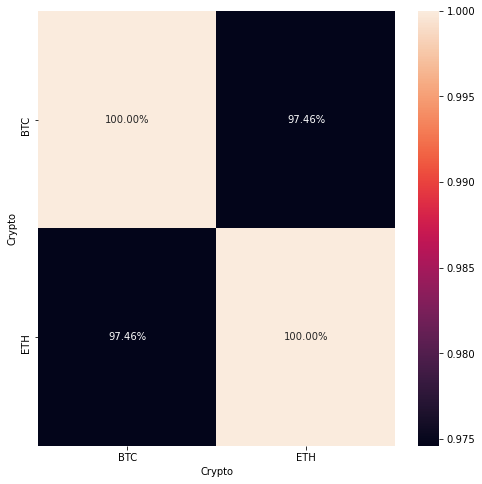

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.subplots(figsize= (8,8))
sns.heatmap(df.corr(), annot= True, fmt= '.2%')

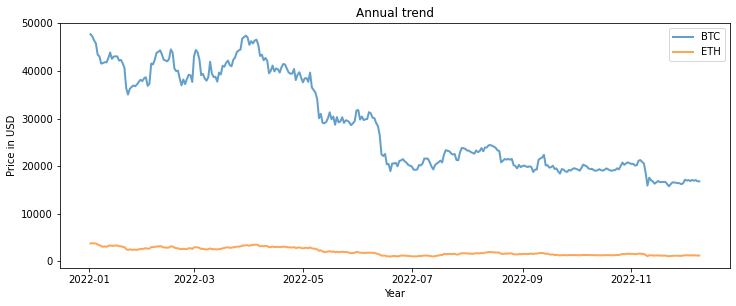

In [34]:
plt.figure(figsize=(12, 4.5))
for c in df.columns.values:
   plt.plot(df.index, df[c], label = c, lw = 2, alpha = .7)
plt.title('Annual trend')
plt.ylabel('Price in USD')
plt.xlabel('Year')
plt.legend(df.columns.values, loc= 'upper right')
plt.show()

In [63]:


DSR =df.pct_change()

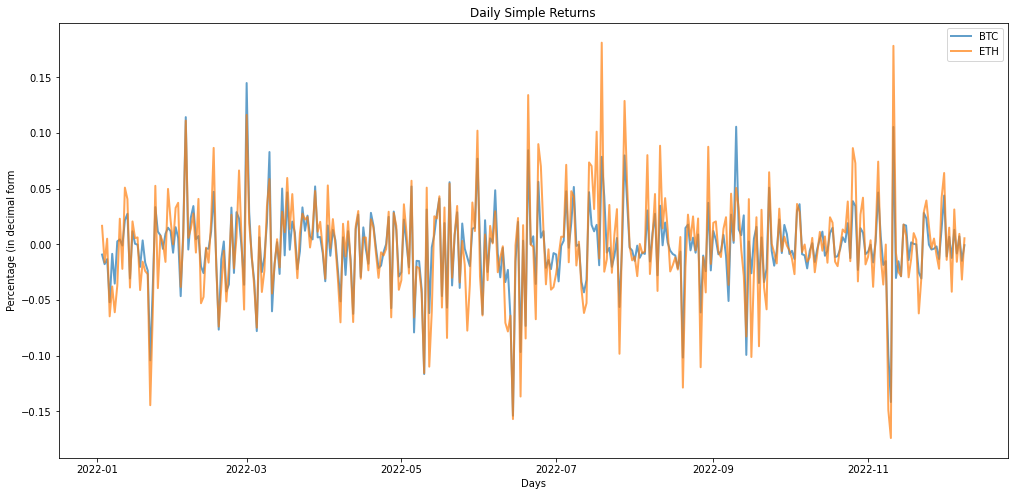

In [64]:
#visualize plot and show the daily simple returns

plt.figure(figsize=(17, 8))
for c in DSR.columns.values:
   plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)
plt.title('Daily Simple Returns')
plt.ylabel('Percentage (in decimal form')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()

In [ ]:
Ethereum has higher daily simple returns than bitcoin

In [65]:
#measure the crypto volatility

DSR.std()

Crypto
BTC    0.034226
ETH    0.046534
dtype: float64

In [ ]:
Ethereum is more volatile than bitcoin

In [67]:
# Calculate daily simple returns between the two coins
DSR.corr()

Crypto,BTC,ETH
Crypto,,
BTC,1.000000,0.892705
ETH,0.892705,1.000000


<AxesSubplot:xlabel='Crypto', ylabel='Crypto'>

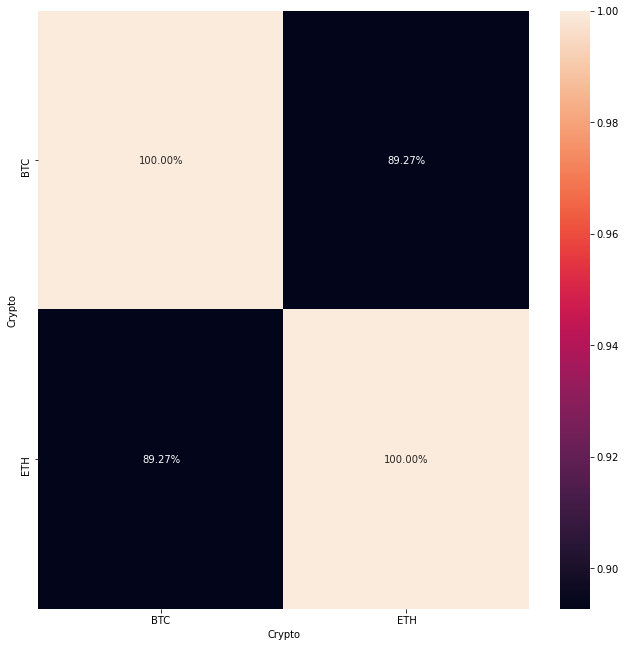

In [71]:
#visualize the correlation

import seaborn as sns
plt.subplots(figsize= (11,11))
sns.heatmap(DSR.corr(), annot= True, fmt= '.2%')


In [72]:

#Show the Daily Cumulative Simple Returns with investment of $1 

DCSR = (DSR+1).cumprod()
DCSR

Crypto,BTC,ETH
Date,,
2022-01-01 23:59:59.999000064,NaN,NaN
2022-01-02 23:59:59.999000064,0.990854,1.016659
2022-01-03 23:59:59.999000064,0.973251,1.000093
2022-01-04 23:59:59.999000064,0.960383,1.005197
2022-01-05 23:59:59.999000064,0.910493,0.940272
...,...,...
2022-12-04 23:59:59.999000064,0.358440,0.339768
2022-12-05 23:59:59.999000064,0.355520,0.334457
2022-12-06 23:59:59.999000064,0.358089,0.337620


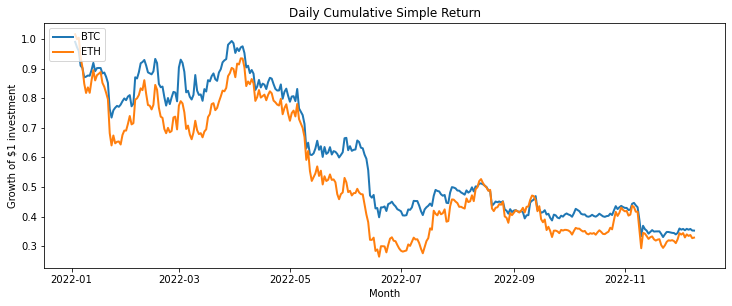

In [74]:
#plot the DCSR
plt.figure(figsize=(12.2, 4.5))
for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c], lw=2, label= c)
plt.title('Daily Cumulative Simple Return')
plt.xlabel('Month')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()

array([[<AxesSubplot:title={'center':'BTC'}>,
        <AxesSubplot:title={'center':'ETH'}>]], dtype=object)

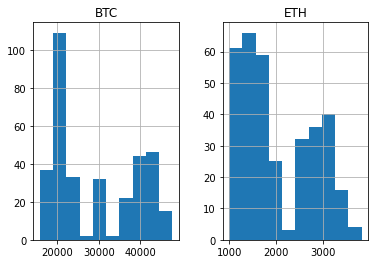

In [43]:

df.hist(bins=10)

In [45]:
import tensorflow as tf

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.pipeline import make_pipeline
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

In [47]:
df_BTC =pd.DataFrame(df.BTC)
df_BTC

,BTC
Date,
2022-01-01 23:59:59.999000064,47722.65
2022-01-02 23:59:59.999000064,47286.18
2022-01-03 23:59:59.999000064,46446.10
2022-01-04 23:59:59.999000064,45832.01
2022-01-05 23:59:59.999000064,43451.13
...,...
2022-12-04 23:59:59.999000064,17105.70
2022-12-05 23:59:59.999000064,16966.35
2022-12-06 23:59:59.999000064,17088.96


array([[<AxesSubplot:title={'center':'BTC'}>]], dtype=object)

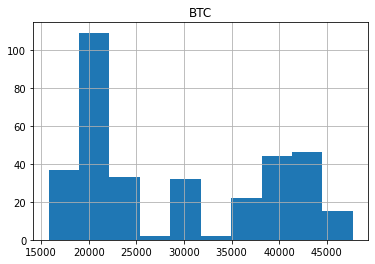

In [50]:
#check distribution of the data
closedf.hist()

In [51]:
# Split the data 

training_data_len = math.ceil(len(closedf) * .6)
testing_data_len =math.ceil(len(closedf) * .4)

closedf =closedf.to_numpy()

train_data = closedf[0:training_data_len, :]
test_data = closedf[0:testing_data_len, :]


In [52]:
test_data.shape

(137, 1)

In [53]:

min_max = MinMaxScaler(feature_range=(0, 1))
scaler = min_max
#transform train data
train_data=scaler.fit_transform(train_data)
#transform test data
test_data=scaler.transform(test_data)

In [76]:

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [78]:
#set the data to have a timestep of 3 days
time_step =3
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test:", y_test.shape)


X_train:  (202, 3)
y_train:  (202,)
X_test:  (133, 3)
y_test: (133,)


In [79]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (202, 3, 1)
X_test:  (133, 3, 1)


In [80]:
#train the model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(3,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),shuffle = False,epochs=50, verbose=1)

Epoch 1/50
7/7 [==============================] - 17s 363ms/step - loss: 0.3693 - val_loss: 0.4462
Epoch 2/50
7/7 [==============================] - 0s 23ms/step - loss: 0.2857 - val_loss: 0.3066
Epoch 3/50
7/7 [==============================] - 0s 23ms/step - loss: 0.1856 - val_loss: 0.1321
Epoch 4/50
7/7 [==============================] - 0s 22ms/step - loss: 0.0828 - val_loss: 0.0106
Epoch 5/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0423 - val_loss: 0.0112
Epoch 6/50
7/7 [==============================] - 0s 23ms/step - loss: 0.0278 - val_loss: 0.0135
Epoch 7/50
7/7 [==============================] - 0s 29ms/step - loss: 0.0248 - val_loss: 0.0234
Epoch 8/50
7/7 [==============================] - 0s 22ms/step - loss: 0.0267 - val_loss: 0.0100
Epoch 9/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0181 - val_loss: 0.0051
Epoch 10/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0128 - val_loss: 0.0055
Epoch 11/50
7/7 [==========

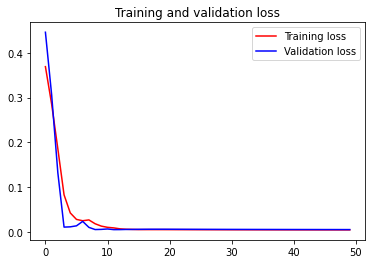

<Figure size 432x288 with 0 Axes>

In [81]:
#plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [83]:
#predict using the model
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 8ms/step


((202, 1), (133, 1))

In [84]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1,1)) 
y_test = scaler.inverse_transform(y_test.reshape(-1,1))
#find R2 score
print(r2_score(y_test, test_predict))

0.7135174461543174


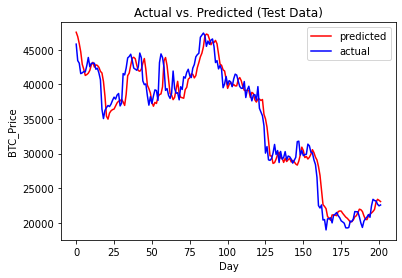

In [85]:
# plot the predicted and actual values
plt.plot(train_predict, color='red')
plt.plot(y_train, color='blue')
plt.title('Actual vs. Predicted (Test Data)')
plt.ylabel('BTC_Price')
plt.xlabel('Day')
plt.legend(['predicted', 'actual'])

In [86]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

RMSE = math.sqrt(mean_squared_error(y_train,train_predict))
MSE = mean_squared_error(y_train,train_predict)
MAE =mean_absolute_error(y_train,train_predict)
print("RMSE is", RMSE )
print("MSE is", MSE )
print ("MAE is", MAE)


RMSE is 1878.4568334492544
MSE is 3528600.0751322
MAE is 1420.0681706373762


In [87]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))
RMSE = math.sqrt(mean_squared_error(y_test,test_predict))
MSE = mean_squared_error(y_test,test_predict)
MAE =mean_absolute_error(y_test,test_predict)
print("RMSE is", RMSE )
print("MSE is", MSE )
print ("MAE is", MAE)


RMSE is 2050.8033645857645
MSE is 4205794.440196292
MAE is 1613.8939538298869
